/var/folders/cg/zjlynwwx5ysgm560rx9sz1mc0000gn/T/ipykernel_69912/1094859958.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['US Race'] = label_encoder.fit_transform(data['US Race'])
/var/folders/cg/zjlynwwx5ysgm560rx9sz1mc0000gn/T/ipykernel_69912/1094859958.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = label_encoder.fit_transform(data['Gender'])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarnin


Segment 1:
                      US Race  Gender
2                       Asian  Female
3                       Asian  Female
6                       Asian  Female
7                       Asian  Female
8                       Asian  Female
11                      Asian    Male
15                      Asian  Female
18                      Asian  Female
19                      Asian    Male
20                      Asian  Female
24                      Other  Female
26                      Asian    Male
27                      Other    Male
31                      Other    Male
33  Black or African American    Male
35                      Asian    Male
36  Black or African American  Female
37                      Asian  Female
42  Black or African American  Female
43                      Asian  Female
44                      Asian    Male
45  Black or African American  Female
48  Black or African American    Male
49                      Asian  Female
50                      Asian  Female


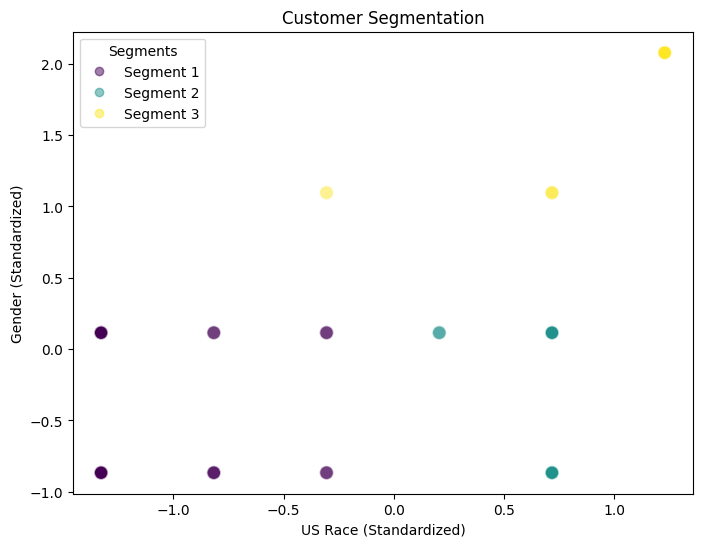

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv('Running_Shoes.csv')

# Selecting relevant columns
selected_columns = ['US Race', 'Gender']

# Extracting selected columns
data = df[selected_columns]

# Encode categorical columns
label_encoder = LabelEncoder()
data['US Race'] = label_encoder.fit_transform(data['US Race'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Handle missing values (impute with mean)
data.fillna(data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Choose the optimal number of clusters (you can use your preferred method)
optimal_k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Segment'] = kmeans.fit_predict(data_standardized)

# Print customers included in each segment
for segment in range(optimal_k):
    segment_data = df[data['Segment'] == segment]
    print(f"\nSegment {segment + 1}:\n{segment_data[selected_columns]}")

# Print which product each segment prefers the most
for segment in range(optimal_k):
    segment_data = df[data['Segment'] == segment]
    preferred_product = segment_data.iloc[:, :-2].mean().idxmax()
    print(f"\nSegment {segment + 1} prefers the most: {preferred_product}")

# Visualize customer segments with a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_standardized[:, 0], data_standardized[:, 1], c=data['Segment'], cmap='viridis', alpha=0.5, edgecolors='w', s=100)  # Adjust the size as needed
plt.title('Customer Segmentation')
plt.xlabel('US Race (Standardized)')
plt.ylabel('Gender (Standardized)')

# Create a legend
legend_labels = [f'Segment {segment + 1}' for segment in range(optimal_k)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Segments')

plt.show()



